In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Dropout, Flatten, Dense
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

2024-07-21 04:14:31.059033: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-21 04:14:31.059167: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-21 04:14:31.206573: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# **Data Processing**

# Training Image Preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/chest-xray-pneumonia/chest_xray/train',
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 5216 files belonging to 2 classes.


# Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/chest-xray-pneumonia/chest_xray/val',
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 16 files belonging to 2 classes.


# **Building Model**

# Building Convolution Layer

In [4]:
cnn = Sequential([
    Input(shape=[128, 128, 1]),
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    Conv2D(filters=32, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Dropout(0.45),
    Flatten(),
    Dense(units=256, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

# Compiling and Training Phase

In [5]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='binary_crossentropy',
            metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [6]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 31, 31, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,757,409 (10.52 MB)

 Trainable params: 2,757,409 (10.52 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
training_history = cnn.fit(training_set, epochs=10, validation_data=validation_set)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.8131 - loss: 0.4392 - precision: 0.8620 - recall: 0.8924 - val_accuracy: 0.7500 - val_loss: 0.4316 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 194s 1s/step - accuracy: 0.9458 - loss: 0.1461 - precision: 0.9621 - recall: 0.9656 - val_accuracy: 0.8125 - val_loss: 0.2273 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 194s 1s/step - accuracy: 0.9598 - loss: 0.0999 - precision: 0.9742 - recall: 0.9717 - val_accuracy: 1.0000 - val_loss: 0.0926 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 195s 1s/step - accuracy: 0.9741 - loss: 0.0661 - precision: 0.9854 - recall: 0.9799 - val_accuracy: 0.8750 - val_loss: 0.2029 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 196s 1s/step - accuracy: 0.9791 - loss: 0.0540 - precision: 0.9886 - recall: 0.9836 - val_accuracy: 0.6250 - val_los

# **Evaluating Model**

In [8]:
# Evaluate the model on the training set
train_loss, train_acc, train_precision, train_recall = cnn.evaluate(training_set)
print('Training loss:', train_loss)
print('Training accuracy:', train_acc)
print('Training precision:', train_precision)
print('Training recall:', train_recall)

163/163 ━━━━━━━━━━━━━━━━━━━━ 61s 375ms/step - accuracy: 0.9976 - loss: 0.0105 - precision: 0.9981 - recall: 0.9987
Training loss: 0.010145560838282108
Training accuracy: 0.9976993799209595
Training precision: 0.9979376196861267
Training recall: 0.9989677667617798


In [9]:
# Explicit unpacking assuming the model was compiled with loss, accuracy, precision, and recall
val_loss, val_acc, val_precision, val_recall = cnn.evaluate(validation_set, verbose=1)
print('Validation Loss:', val_loss)
print('Validation Accuracy:', val_acc)
print('Validation Precision:', val_precision)
print('Validation Recall:', val_recall)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 0.8750 - loss: 0.2192 - precision: 0.8000 - recall: 1.0000
Validation Loss: 0.21923357248306274
Validation Accuracy: 0.875
Validation Precision: 0.800000011920929
Validation Recall: 1.0


# **Saving Model**

In [10]:
cnn.save('pneumonia_x-ray_model.keras')

In [11]:
# Dcitionary of Training History
training_history.history

{'accuracy': [0.8757668733596802,
  0.9451687335968018,
  0.9633818864822388,
  0.9710506200790405,
  0.9764187335968018,
  0.9768021702766418,
  0.9867714643478394,
  0.9844708442687988,
  0.9904140830039978,
  0.9930981397628784],
 'loss': [0.29343241453170776,
  0.14194005727767944,
  0.09337925165891647,
  0.07179118692874908,
  0.058497920632362366,
  0.05518585070967674,
  0.03884682431817055,
  0.04018512740731239,
  0.02951326034963131,
  0.018838994204998016],
 'precision': [0.9069356918334961,
  0.9611924886703491,
  0.9754775166511536,
  0.9818840622901917,
  0.9852560758590698,
  0.9847623705863953,
  0.9912235140800476,
  0.9901808500289917,
  0.9943137764930725,
  0.9956106543540955],
 'recall': [0.9279999732971191,
  0.9651612639427185,
  0.9752258062362671,
  0.9790967702865601,
  0.982967734336853,
  0.984000027179718,
  0.9909677505493164,
  0.9889032244682312,
  0.9927741885185242,
  0.9950968027114868],
 'val_accuracy': [0.75,
  0.8125,
  1.0,
  0.875,
  0.625,
  0.

In [12]:
import json
with open('training_hist.json','w') as training_file:
  json.dump(training_history.history,training_file)

In [13]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'precision', 'recall', 'val_accuracy', 'val_loss', 'val_precision', 'val_recall'])


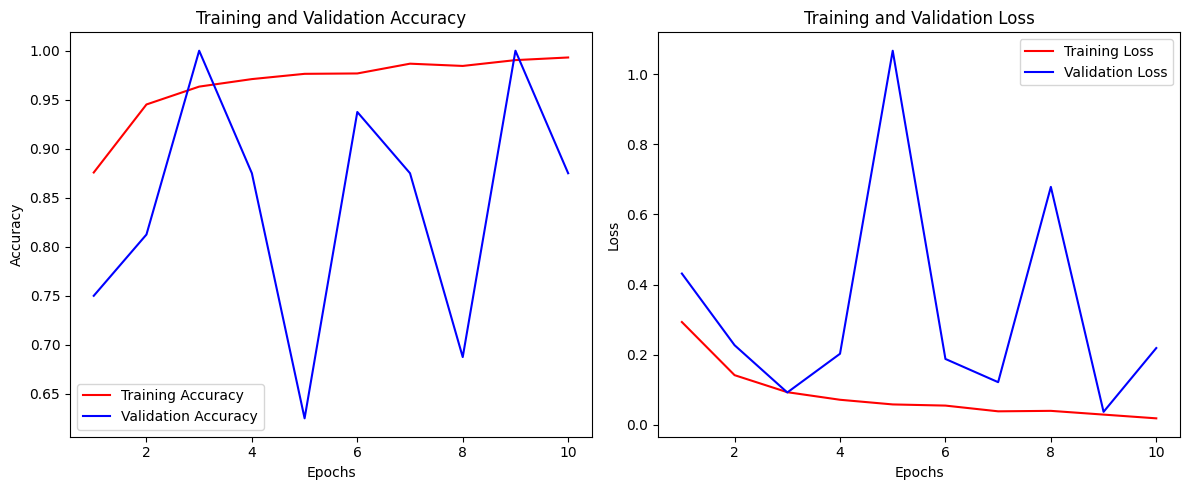

In [14]:
# Assuming `training_history` is the output of your model's fit method
epochs = [i for i in range(1, 11)]

# Plotting training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(epochs, training_history.history['loss'], color='red', label='Training Loss')
plt.plot(epochs, training_history.history['val_loss'], color='blue', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()